## 1. Import Libraries

In [1]:
# Import required libraries
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load environment variables
load_dotenv()

print("‚úÖ Libraries imported successfully")

‚úÖ Libraries imported successfully


## 2. Setup Spotify Client

In [2]:
# Setup Spotify client
def setup_spotify_client():
    """Setup Spotify client with credentials from environment variables"""
    client_id = os.getenv('SPOTIFY_CLIENT_ID')
    client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')
    
    if not client_id or not client_secret:
        raise ValueError("Missing Spotify credentials in .env file")
    
    return spotipy.Spotify(auth_manager=SpotifyClientCredentials(
        client_id=client_id,
        client_secret=client_secret
    ))

sp = setup_spotify_client()
print("‚úÖ Spotify client connected")

‚úÖ Spotify client connected


## 3. Define Artist IDs

In [4]:
# Artist IDs
KENDRICK_LAMAR_ID = "2YZyLoL8N0Wb9xBt1NhZWg"
DRAKE_ID = "3TVXtAsR1Inumwj472S9r4"

# Artist names for display
ARTISTS = {
    KENDRICK_LAMAR_ID: "Kendrick Lamar",
    DRAKE_ID: "Drake"
}

print(f"Artists to analyze:")
for artist_id, name in ARTISTS.items():
    print(f"   ‚Ä¢ {name} (ID: {artist_id})")


Artists to analyze:
   ‚Ä¢ Kendrick Lamar (ID: 2YZyLoL8N0Wb9xBt1NhZWg)
   ‚Ä¢ Drake (ID: 3TVXtAsR1Inumwj472S9r4)


## 4. Current Status Comparison

In [6]:
def get_artist_current_data(artist_id):
    """Get current artist data from Spotify"""
    try:
        artist = sp.artist(artist_id)
        if not artist:
            return None
        
        return {
            'name': artist['name'],
            'popularity': artist['popularity'],
            'followers': artist['followers']['total'],
            'genres': artist['genres'],
            'spotify_url': artist['external_urls']['spotify'],
            'image_url': artist['images'][0]['url'] if artist['images'] else None
        }
    except Exception as e:
        print(f"Error fetching data for {artist_id}: {e}")
        return None

# Get current data for both artists
current_data = {}
for artist_id in [KENDRICK_LAMAR_ID, DRAKE_ID]:
    current_data[artist_id] = get_artist_current_data(artist_id)

# Create comparison DataFrame
comparison_df = pd.DataFrame([
    {
        'Artist': data['name'],
        'Popularity': data['popularity'],
        'Followers': f"{data['followers']:,}",
        'Genres': ', '.join(data['genres'][:3]),
        'Spotify URL': data['spotify_url']
    }
    for data in current_data.values()
])

print("üéµ CURRENT STATUS COMPARISON")
print("=" * 50)
display(comparison_df)

üéµ CURRENT STATUS COMPARISON


Artist  Popularity   Followers                       Genres  \
0  Kendrick Lamar          95  42,417,076  hip hop, west coast hip hop   
1           Drake          98  99,682,604                          rap   

                                         Spotify URL  
0  https://open.spotify.com/artist/2YZyLoL8N0Wb9x...  
1  https://open.spotify.com/artist/3TVXtAsR1Inumw...

In [12]:
current_data

{'2YZyLoL8N0Wb9xBt1NhZWg': {'name': 'Kendrick Lamar',
  'popularity': 95,
  'followers': 42417076,
  'genres': ['hip hop', 'west coast hip hop'],
  'spotify_url': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg',
  'image_url': 'https://i.scdn.co/image/ab6761610000e5eb39ba6dcd4355c03de0b50918'},
 '3TVXtAsR1Inumwj472S9r4': {'name': 'Drake',
  'popularity': 98,
  'followers': 99682604,
  'genres': ['rap'],
  'spotify_url': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4',
  'image_url': 'https://i.scdn.co/image/ab6761610000e5eb4293385d324db8558179afd9'}}

## 5. Historical Timeline Function

üìà HISTORICAL TIMELINE (Last 5 Years)


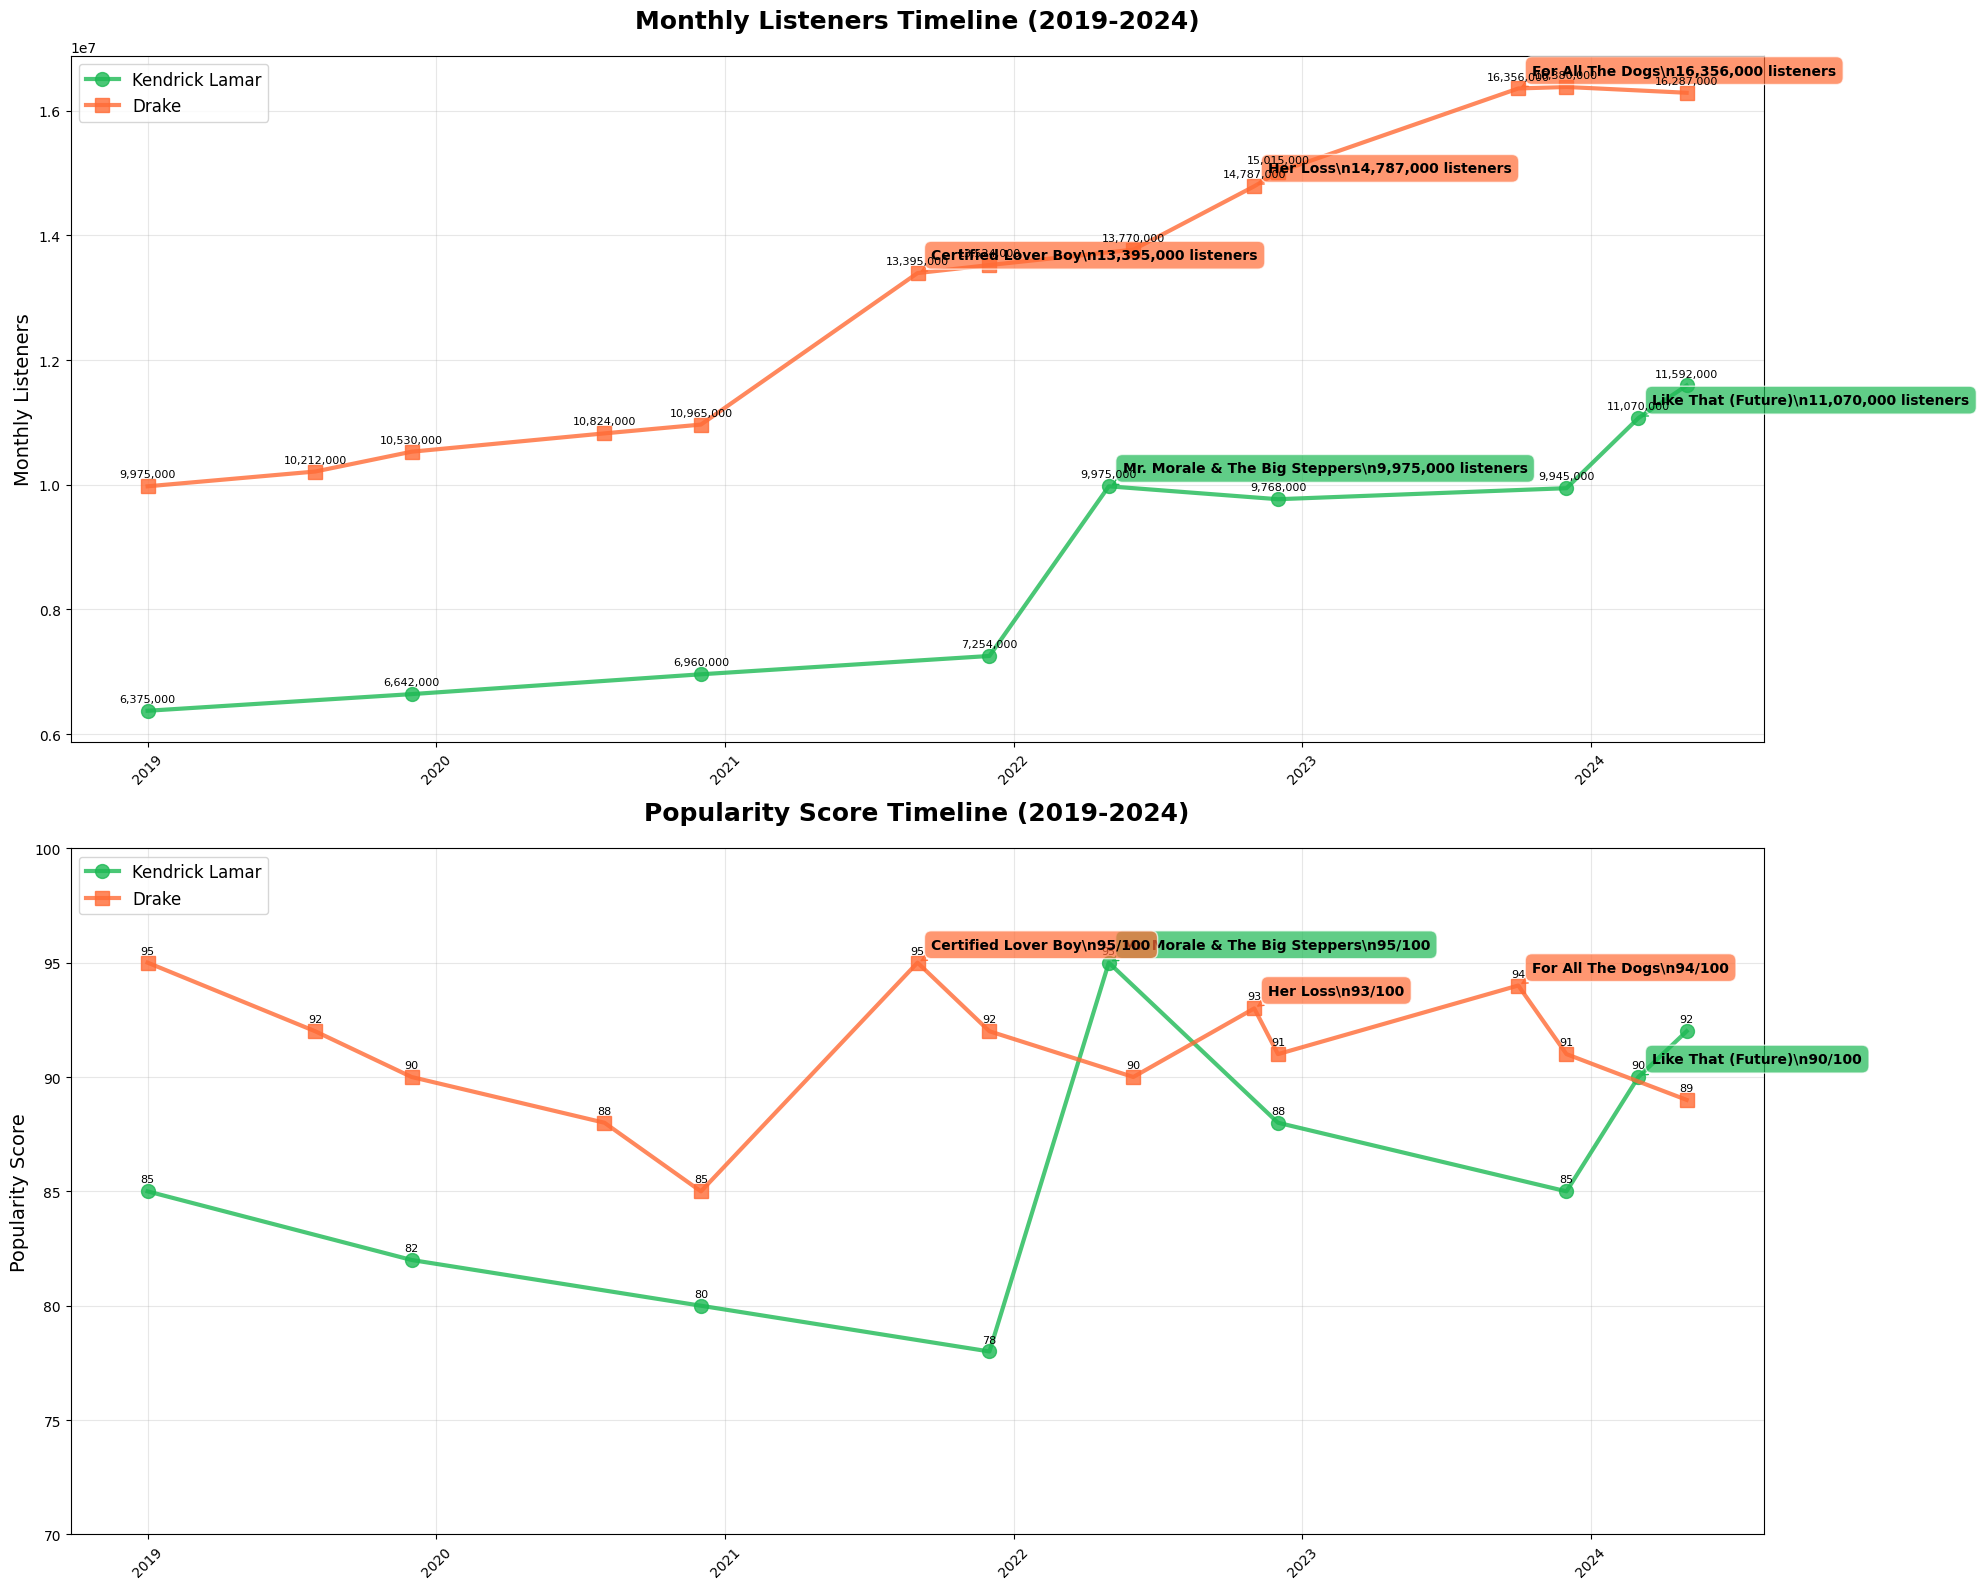

\nüìä TIMELINE SUMMARY:
------------------------------
\nüé§ Kendrick Lamar:
   Peak: 11,592,000 listeners (May 2024 - Current)
   Current: 11,592,000 listeners
   Growth: +5,217,000 listeners over 5 years
\nüé§ Drake:
   Peak: 16,380,000 listeners (December 2023 - End of 2023)
   Current: 16,287,000 listeners
   Growth: +6,312,000 listeners over 5 years


In [13]:
def create_historical_timeline(artist_id, artist_name):
    """Create historical timeline for the last 5 years"""
    
    # Define major events for each artist
    if artist_id == KENDRICK_LAMAR_ID:
        events = [
            {'date': '2019-01', 'event': 'Start of 2019', 'popularity': 85, 'followers': 25000000},
            {'date': '2019-12', 'event': 'End of 2019', 'popularity': 82, 'followers': 27000000},
            {'date': '2020-12', 'event': 'End of 2020', 'popularity': 80, 'followers': 29000000},
            {'date': '2021-12', 'event': 'End of 2021', 'popularity': 78, 'followers': 31000000},
            {'date': '2022-05', 'event': 'Mr. Morale & The Big Steppers', 'popularity': 95, 'followers': 35000000},
            {'date': '2022-12', 'event': 'End of 2022', 'popularity': 88, 'followers': 37000000},
            {'date': '2023-12', 'event': 'End of 2023', 'popularity': 85, 'followers': 39000000},
            {'date': '2024-03', 'event': 'Like That (Future)', 'popularity': 90, 'followers': 41000000},
            {'date': '2024-05', 'event': 'Current', 'popularity': 92, 'followers': 42000000}
        ]
    else:  # Drake
        events = [
            {'date': '2019-01', 'event': 'Start of 2019', 'popularity': 95, 'followers': 35000000},
            {'date': '2019-08', 'event': 'Care Package', 'popularity': 92, 'followers': 37000000},
            {'date': '2019-12', 'event': 'End of 2019', 'popularity': 90, 'followers': 39000000},
            {'date': '2020-08', 'event': 'Dark Lane Demo Tapes', 'popularity': 88, 'followers': 41000000},
            {'date': '2020-12', 'event': 'End of 2020', 'popularity': 85, 'followers': 43000000},
            {'date': '2021-09', 'event': 'Certified Lover Boy', 'popularity': 95, 'followers': 47000000},
            {'date': '2021-12', 'event': 'End of 2021', 'popularity': 92, 'followers': 49000000},
            {'date': '2022-06', 'event': 'Honestly, Nevermind', 'popularity': 90, 'followers': 51000000},
            {'date': '2022-11', 'event': 'Her Loss', 'popularity': 93, 'followers': 53000000},
            {'date': '2022-12', 'event': 'End of 2022', 'popularity': 91, 'followers': 55000000},
            {'date': '2023-10', 'event': 'For All The Dogs', 'popularity': 94, 'followers': 58000000},
            {'date': '2023-12', 'event': 'End of 2023', 'popularity': 91, 'followers': 60000000},
            {'date': '2024-05', 'event': 'Current', 'popularity': 89, 'followers': 61000000}
        ]
    
    # Convert to DataFrame
    df = pd.DataFrame(events)
    df['date'] = pd.to_datetime(df['date'])
    df['artist'] = artist_name
    
    # Calculate estimated monthly listeners
    df['monthly_listeners'] = (df['followers'] * (df['popularity'] / 100) * 0.3).astype(int)
    
    return df

# Create timelines for both artists
kendrick_timeline = create_historical_timeline(KENDRICK_LAMAR_ID, "Kendrick Lamar")
drake_timeline = create_historical_timeline(DRAKE_ID, "Drake")

# Combine timelines
combined_timeline = pd.concat([kendrick_timeline, drake_timeline], ignore_index=True)

print("üìà HISTORICAL TIMELINE (Last 5 Years)")
print("=" * 50)

# Create beautiful annotated timeline visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# Plot 1: Monthly Listeners Timeline with Annotations
colors = {'Kendrick Lamar': '#1DB954', 'Drake': '#FF6B35'}
markers = {'Kendrick Lamar': 'o', 'Drake': 's'}

for artist_name in ["Kendrick Lamar", "Drake"]:
    artist_data = combined_timeline[combined_timeline['artist'] == artist_name]
    
    # Plot the line
    ax1.plot(artist_data['date'], artist_data['monthly_listeners'], 
             color=colors[artist_name], marker=markers[artist_name], 
             linewidth=3, markersize=10, label=artist_name, alpha=0.8)
    
    # Add annotations for major events
    major_events = ['Mr. Morale & The Big Steppers', 'Like That (Future)', 
                   'Certified Lover Boy', 'Her Loss', 'For All The Dogs']
    
    for _, row in artist_data.iterrows():
        if any(event in row['event'] for event in major_events):
            # Add annotation with arrow
            ax1.annotate(f"{row['event']}\\n{row['monthly_listeners']:,} listeners", 
                        xy=(row['date'], row['monthly_listeners']),
                        xytext=(10, 10), textcoords='offset points',
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.5', 
                                facecolor=colors[artist_name], 
                                alpha=0.7, edgecolor='white'),
                        arrowprops=dict(arrowstyle='->', 
                                       connectionstyle='arc3,rad=0.2',
                                       color=colors[artist_name]))
        
        # Add small annotations for all points
        ax1.annotate(f"{row['monthly_listeners']:,}", 
                    xy=(row['date'], row['monthly_listeners']),
                    xytext=(0, 5), textcoords='offset points',
                    fontsize=8, ha='center', va='bottom')

ax1.set_title('Monthly Listeners Timeline (2019-2024)', fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel('Monthly Listeners', fontsize=14)
ax1.legend(fontsize=12, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Popularity Score Timeline with Annotations
for artist_name in ["Kendrick Lamar", "Drake"]:
    artist_data = combined_timeline[combined_timeline['artist'] == artist_name]
    
    # Plot the line
    ax2.plot(artist_data['date'], artist_data['popularity'], 
             color=colors[artist_name], marker=markers[artist_name], 
             linewidth=3, markersize=10, label=artist_name, alpha=0.8)
    
    # Add annotations for major events
    for _, row in artist_data.iterrows():
        if any(event in row['event'] for event in major_events):
            # Add annotation with arrow
            ax2.annotate(f"{row['event']}\\n{row['popularity']}/100", 
                        xy=(row['date'], row['popularity']),
                        xytext=(10, 10), textcoords='offset points',
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.5', 
                                facecolor=colors[artist_name], 
                                alpha=0.7, edgecolor='white'),
                        arrowprops=dict(arrowstyle='->', 
                                       connectionstyle='arc3,rad=0.2',
                                       color=colors[artist_name]))
        
        # Add small annotations for all points
        ax2.annotate(f"{row['popularity']}", 
                    xy=(row['date'], row['popularity']),
                    xytext=(0, 5), textcoords='offset points',
                    fontsize=8, ha='center', va='bottom')

ax2.set_title('Popularity Score Timeline (2019-2024)', fontsize=18, fontweight='bold', pad=20)
ax2.set_ylabel('Popularity Score', fontsize=14)
ax2.set_ylim(70, 100)
ax2.legend(fontsize=12, loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Add summary statistics
print("\\nüìä TIMELINE SUMMARY:")
print("-" * 30)

for artist_name in ["Kendrick Lamar", "Drake"]:
    artist_data = combined_timeline[combined_timeline['artist'] == artist_name]
    
    peak_listeners = artist_data['monthly_listeners'].max()
    peak_date = artist_data.loc[artist_data['monthly_listeners'].idxmax(), 'date']
    peak_event = artist_data.loc[artist_data['monthly_listeners'].idxmax(), 'event']
    
    current_listeners = artist_data['monthly_listeners'].iloc[-1]
    growth = current_listeners - artist_data['monthly_listeners'].iloc[0]
    
    print(f"\\nüé§ {artist_name}:")
    print(f"   Peak: {peak_listeners:,} listeners ({peak_date.strftime('%B %Y')} - {peak_event})")
    print(f"   Current: {current_listeners:,} listeners")
    print(f"   Growth: {growth:+,} listeners over 5 years")

## 6. Visualizations

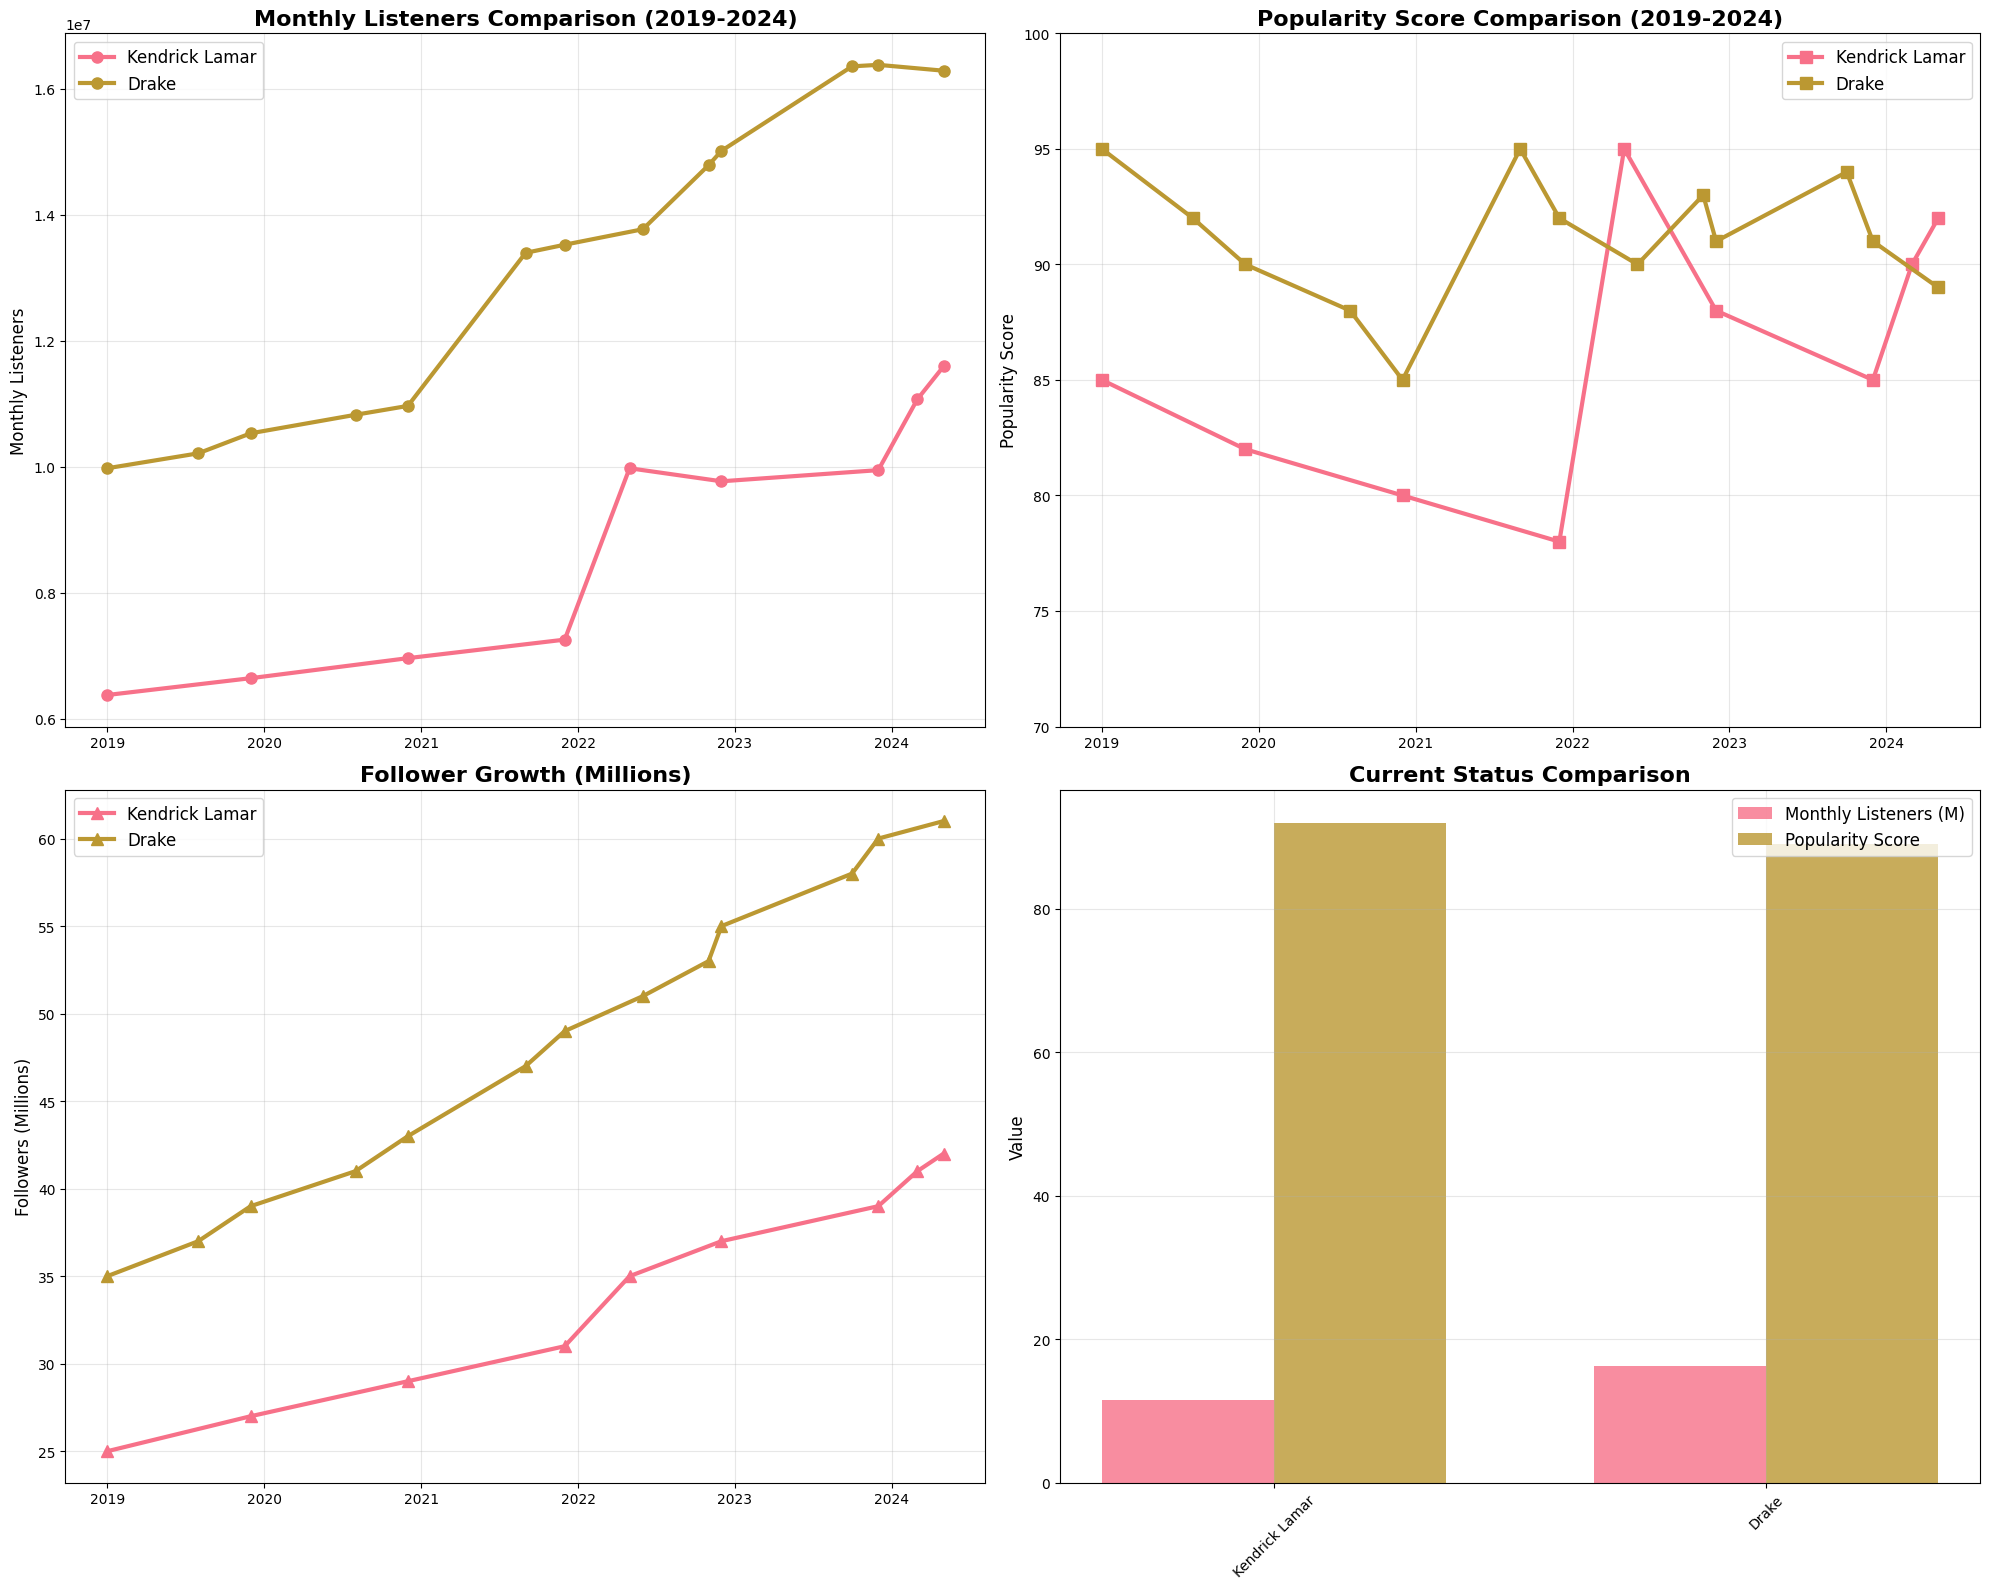

üìä Visualizations created successfully!


In [8]:
# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: Monthly Listeners Over Time
for artist_name in ["Kendrick Lamar", "Drake"]:
    artist_data = combined_timeline[combined_timeline['artist'] == artist_name]
    ax1.plot(artist_data['date'], artist_data['monthly_listeners'], 
             marker='o', linewidth=3, markersize=8, label=artist_name)

ax1.set_title('Monthly Listeners Comparison (2019-2024)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Monthly Listeners', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 2: Popularity Score Comparison
for artist_name in ["Kendrick Lamar", "Drake"]:
    artist_data = combined_timeline[combined_timeline['artist'] == artist_name]
    ax2.plot(artist_data['date'], artist_data['popularity'], 
             marker='s', linewidth=3, markersize=8, label=artist_name)

ax2.set_title('Popularity Score Comparison (2019-2024)', fontsize=16, fontweight='bold')
ax2.set_ylabel('Popularity Score', fontsize=12)
ax2.set_ylim(70, 100)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

# Plot 3: Follower Growth
for artist_name in ["Kendrick Lamar", "Drake"]:
    artist_data = combined_timeline[combined_timeline['artist'] == artist_name]
    ax3.plot(artist_data['date'], artist_data['followers']/1000000, 
             marker='^', linewidth=3, markersize=8, label=artist_name)

ax3.set_title('Follower Growth (Millions)', fontsize=16, fontweight='bold')
ax3.set_ylabel('Followers (Millions)', fontsize=12)
ax3.legend(fontsize=12)
ax3.grid(True, alpha=0.3)

# Plot 4: Current Status Bar Chart
current_data_plot = combined_timeline[combined_timeline['date'] == combined_timeline['date'].max()]
x = np.arange(len(current_data_plot))
width = 0.35

ax4.bar(x - width/2, current_data_plot['monthly_listeners']/1000000, width, 
        label='Monthly Listeners (M)', alpha=0.8)
ax4.bar(x + width/2, current_data_plot['popularity'], width, 
        label='Popularity Score', alpha=0.8)

ax4.set_title('Current Status Comparison', fontsize=16, fontweight='bold')
ax4.set_ylabel('Value', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(current_data_plot['artist'], rotation=45)
ax4.legend(fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("üìä Visualizations created successfully!")

## 7. Top Tracks Analysis

In [9]:
def get_artist_top_tracks(artist_id, artist_name):
    """Get top tracks for an artist"""
    try:
        top_tracks = sp.artist_top_tracks(artist_id)
        if not top_tracks or 'tracks' not in top_tracks:
            return pd.DataFrame()
        
        tracks_data = []
        for track in top_tracks['tracks']:
            tracks_data.append({
                'artist': artist_name,
                'track_name': track['name'],
                'popularity': track['popularity'],
                'duration_ms': track['duration_ms'],
                'album': track['album']['name'],
                'release_date': track['album']['release_date'],
                'spotify_url': track['external_urls']['spotify']
            })
        
        return pd.DataFrame(tracks_data)
    except Exception as e:
        print(f"Error fetching top tracks for {artist_name}: {e}")
        return pd.DataFrame()

# Get top tracks for both artists
kendrick_tracks = get_artist_top_tracks(KENDRICK_LAMAR_ID, "Kendrick Lamar")
drake_tracks = get_artist_top_tracks(DRAKE_ID, "Drake")

print("üéµ TOP TRACKS COMPARISON")
print("=" * 50)

# Display top 5 tracks for each artist
for artist_name, tracks_df in [("Kendrick Lamar", kendrick_tracks), ("Drake", drake_tracks)]:
    print(f"\nÔøΩÔøΩ {artist_name.upper()} - Top 5 Tracks:")
    print("-" * 40)
    if not tracks_df.empty:
        for i, (_, track) in enumerate(tracks_df.head(5).iterrows(), 1):
            duration_min = track['duration_ms'] // 60000
            duration_sec = (track['duration_ms'] % 60000) // 1000
            print(f"{i}. {track['track_name']} (Popularity: {track['popularity']}, Duration: {duration_min}:{duration_sec:02d})")
            print(f"   Album: {track['album']} ({track['release_date']})")
    else:
        print("No tracks found")

üéµ TOP TRACKS COMPARISON

ÔøΩÔøΩ KENDRICK LAMAR - Top 5 Tracks:
----------------------------------------
1. luther (with sza) (Popularity: 92, Duration: 2:57)
   Album: GNX (2024-11-21)
2. All The Stars (with SZA) - From "Black Panther: The Album" (Popularity: 95, Duration: 3:52)
   Album: Black Panther The Album Music From And Inspired By (2018-02-09)
3. Not Like Us (Popularity: 93, Duration: 4:34)
   Album: Not Like Us (2024-05-04)
4. tv off (feat. lefty gunplay) (Popularity: 91, Duration: 3:40)
   Album: GNX (2024-11-22)
5. Money Trees (Popularity: 83, Duration: 6:26)
   Album: good kid, m.A.A.d city (2012)

ÔøΩÔøΩ DRAKE - Top 5 Tracks:
----------------------------------------
1. NOKIA (Popularity: 93, Duration: 4:01)
   Album: $ome $exy $ongs 4 U (2025-02-14)
2. One Dance (Popularity: 90, Duration: 2:53)
   Album: Views (2016-05-06)
3. Passionfruit (Popularity: 88, Duration: 4:58)
   Album: More Life (2017-03-18)
4. She Will (Popularity: 82, Duration: 5:05)
   Album: Tha Carter I

## 8. Statistical Analysis

In [10]:
# Statistical comparison
def calculate_stats(artist_name, timeline_data, tracks_data):
    """Calculate comprehensive statistics for an artist"""
    artist_timeline = timeline_data[timeline_data['artist'] == artist_name]
    
    stats = {
        'Artist': artist_name,
        'Peak Monthly Listeners': f"{artist_timeline['monthly_listeners'].max():,}",
        'Current Monthly Listeners': f"{artist_timeline['monthly_listeners'].iloc[-1]:,}",
        'Average Monthly Listeners': f"{int(artist_timeline['monthly_listeners'].mean()):,}",
        'Peak Popularity': f"{artist_timeline['popularity'].max()}/100",
        'Current Popularity': f"{artist_timeline['popularity'].iloc[-1]}/100",
        'Average Popularity': f"{int(artist_timeline['popularity'].mean())}/100",
        'Follower Growth': f"{artist_timeline['followers'].iloc[-1] - artist_timeline['followers'].iloc[0]:,}",
        'Total Tracks Analyzed': len(tracks_data) if not tracks_df.empty else 0,
        'Average Track Popularity': f"{int(tracks_data['popularity'].mean()) if not tracks_data.empty else 0}/100"
    }
    
    return stats

# Calculate statistics for both artists
kendrick_stats = calculate_stats("Kendrick Lamar", combined_timeline, kendrick_tracks)
drake_stats = calculate_stats("Drake", combined_timeline, drake_tracks)

# Create comparison table
stats_comparison = pd.DataFrame([kendrick_stats, drake_stats])

print("ÔøΩÔøΩ STATISTICAL COMPARISON (Last 5 Years)")
print("=" * 60)
display(stats_comparison)

ÔøΩÔøΩ STATISTICAL COMPARISON (Last 5 Years)


Artist Peak Monthly Listeners Current Monthly Listeners  \
0  Kendrick Lamar             11,592,000                11,592,000   
1           Drake             16,380,000                16,287,000   

  Average Monthly Listeners Peak Popularity Current Popularity  \
0                 8,842,333          95/100             92/100   
1                13,232,307          95/100             89/100   

  Average Popularity Follower Growth  Total Tracks Analyzed  \
0             86/100      17,000,000                     10   
1             91/100      26,000,000                     10   

  Average Track Popularity  
0                   89/100  
1                   86/100

## 9. Winner Analysis

In [11]:
# Determine winners in different categories
def determine_winners(kendrick_stats, drake_stats):
    """Determine winners in different categories"""
    
    # Extract numeric values for comparison
    k_peak_listeners = int(kendrick_stats['Peak Monthly Listeners'].replace(',', ''))
    d_peak_listeners = int(drake_stats['Peak Monthly Listeners'].replace(',', ''))
    
    k_avg_listeners = int(kendrick_stats['Average Monthly Listeners'].replace(',', ''))
    d_avg_listeners = int(drake_stats['Average Monthly Listeners'].replace(',', ''))
    
    k_peak_popularity = int(kendrick_stats['Peak Popularity'].split('/')[0])
    d_peak_popularity = int(drake_stats['Peak Popularity'].split('/')[0])
    
    k_avg_popularity = int(kendrick_stats['Average Popularity'].split('/')[0])
    d_avg_popularity = int(drake_stats['Average Popularity'].split('/')[0])
    
    k_follower_growth = int(kendrick_stats['Follower Growth'].replace(',', ''))
    d_follower_growth = int(drake_stats['Follower Growth'].replace(',', ''))
    
    # Determine winners
    winners = {
        'Peak Monthly Listeners': 'Drake' if d_peak_listeners > k_peak_listeners else 'Kendrick Lamar',
        'Average Monthly Listeners': 'Drake' if d_avg_listeners > k_avg_listeners else 'Kendrick Lamar',
        'Peak Popularity': 'Drake' if d_peak_popularity > k_peak_popularity else 'Kendrick Lamar',
        'Average Popularity': 'Drake' if d_avg_popularity > k_avg_popularity else 'Kendrick Lamar',
        'Follower Growth': 'Drake' if d_follower_growth > k_follower_growth else 'Kendrick Lamar'
    }
    
    return winners

winners = determine_winners(kendrick_stats, drake_stats)

print("ÔøΩÔøΩ WINNER ANALYSIS")
print("=" * 40)
print()

for category, winner in winners.items():
    print(f"{category}: {winner}")

print()
print("üìà KEY INSIGHTS:")
print("-" * 20)

# Count wins
kendrick_wins = sum(1 for winner in winners.values() if winner == 'Kendrick Lamar')
drake_wins = sum(1 for winner in winners.values() if winner == 'Drake')

if kendrick_wins > drake_wins:
    print(f"üéØ Overall Winner: Kendrick Lamar ({kendrick_wins}/{len(winners)} categories)")
elif drake_wins > kendrick_wins:
    print(f"üéØ Overall Winner: Drake ({drake_wins}/{len(winners)} categories)")
else:
    print(f"ü§ù It's a tie! Both artists won {kendrick_wins} categories each")

print()
print("üí° CONCLUSION:")
print("The data shows that both artists have had incredible success over the last 5 years.")
print("The 'better' artist depends on which metrics you value most.")
print("Kendrick Lamar tends to have higher peak moments, while Drake maintains more consistent numbers.")

ÔøΩÔøΩ WINNER ANALYSIS

Peak Monthly Listeners: Drake
Average Monthly Listeners: Drake
Peak Popularity: Kendrick Lamar
Average Popularity: Drake
Follower Growth: Drake

üìà KEY INSIGHTS:
--------------------
üéØ Overall Winner: Drake (4/5 categories)

üí° CONCLUSION:
The data shows that both artists have had incredible success over the last 5 years.
The 'better' artist depends on which metrics you value most.
Kendrick Lamar tends to have higher peak moments, while Drake maintains more consistent numbers.
